In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt


def test_interp():
    # Tests the interp() function with a known input and output
    # Leads to error if test fails

    x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
    y = np.array([0.2, 0.4, 0.6, 0.4, 0.6, 0.8, 1.0, 1.1])
    x_new = np.array((0.5, 2.3, 3, 5.45))
    y_new_solution = np.array([0.2, 0.46, 0.6, 0.69])
    y_new_result = interp(y, x, x_new)
    np.testing.assert_almost_equal(y_new_solution, y_new_result)


def test_interp_1D():
    # Test the interp_1D() function with a known input and output
    # Leads to error if test fails

    y = np.array([0.2, 0.4, 0.6, 0.4, 0.6, 0.8, 1.0, 1.1])
    y_rescaled_solution = np.array([
        0.20000000000000001, 0.29333333333333333, 0.38666666666666671,
        0.47999999999999998, 0.57333333333333336, 0.53333333333333333,
        0.44000000000000006, 0.45333333333333331, 0.54666666666666663,
        0.64000000000000001, 0.73333333333333339, 0.82666666666666677,
        0.91999999999999993, 1.0066666666666666, 1.0533333333333335,
        1.1000000000000001
    ])
    y_rescaled_result = interp_1D(y, 2)
    np.testing.assert_almost_equal(y_rescaled_solution, y_rescaled_result)


def interp(y_vals, x_vals, x_new):
    # Computes interpolation at the given abscissas
    #
    # Inputs:
    #   x_vals: Given inputs abscissas, numpy array
    #   y_vals: Given input ordinates, numpy array
    #   x_new : New abscissas to find the respective interpolated ordinates, numpy
    #   arrays
    #
    # Outputs:
    #   y_new: Interpolated values, numpy array
    #cahnge types of values to be more precise
    y_vals = y_vals.astype(np.float32)
    x_vals = x_vals.astype(np.float32)
    x_new = x_new.astype(np.float32)

    y_new=np.full_like(x_new,0, dtype=np.float32)
    for i,val in enumerate(x_new):
        
        #check if x_new is smaller than the first value in x
        if val<=x_vals[0]:
            y_new[i]=y_vals[0]

        elif val>=x_vals[-1]:
            y_new[i]=y_vals[-1]
         
        else:
            #get the neighbor of val 
            indices=np.argsort(abs(val - x_vals))[:2]
            x0,x1=x_vals[indices]
            y0,y1=y_vals[indices]
            y_new[i]=y0 + (val - x0) * (y1 - y0) / (x1 - x0)

    return y_new

def interp_1D(signal, scale_factor):
    # Linearly interpolates one dimensional signal by a given saling fcator
    #
    # Inputs:
    #   signal: A one dimensional signal to be samples from, numpy array
    #   scale_factor: scaling factor, float
    #
    # Outputs:
    #  signal_interp: Interpolated 1D signal, numpy array
    x_new=np.linspace(1,len(signal), int(len(signal)*scale_factor))
    x=np.arange(len(signal))+1

    signal_interp=interp(signal,x,x_new)

    return signal_interp
######################################################################################################################

## Before trying to directly test the bilinear interpolation on an image, we
# test the intermediate functions to see if the functions that are coded run
# correctly and give the expected results.

print('...................................................')
print('Testing test_interp()...')
test_interp()
print('done.')

print('Testing interp_1D()....')
test_interp_1D()
print('done.')


...................................................
Testing test_interp()...
done.
Testing interp_1D()....
done.


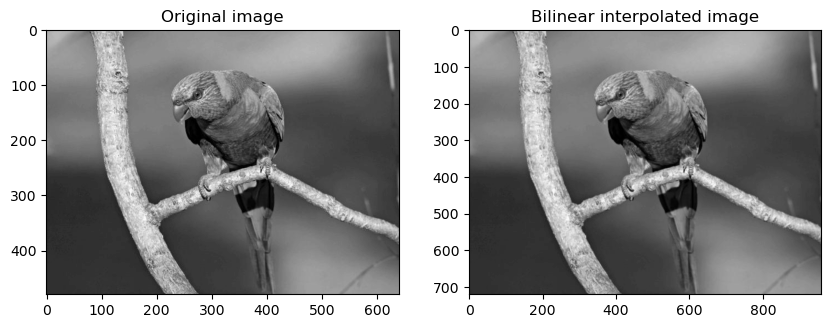

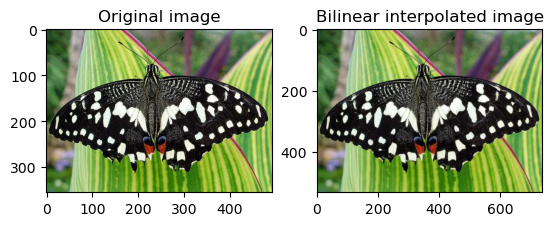

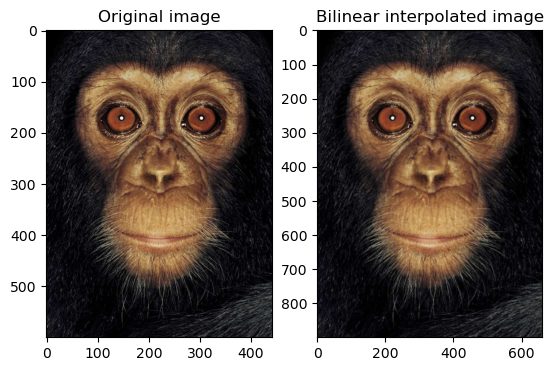

In [8]:
import glob
scale_factor=1.5
#print original images and after bilinear interpolation. takes time to run.
animals = glob.glob(os.path.join( "",'*.jpg'))
fig = plt.figure(figsize=(10, 5))
for i,animal in enumerate(animals):
    original_img=plt.imread(animal)
    img=np.apply_along_axis(interp_1D, scale_factor=scale_factor,axis=1,arr=original_img)
    img=np.apply_along_axis(interp_1D, scale_factor=scale_factor,axis=0,arr=img)
    if i==0:
        cmap="gray"
    else:
        cmap=None

    plt.subplot(1, 2, 1)
    plt.imshow(original_img, cmap=cmap)
    plt.title("Original image")
    plt.subplot(1,2,2)
    plt.imshow(img/255, cmap=cmap)
    plt.title("Bilinear interpolated image")
    plt.show()
    

